In [1]:
from model import NSFrozenLake
from amalearn.agent import AgentBase
from draw_policy import draw_policy
from plots import plot_total_episode_rewards, plot_regret, get_average
from find_max_reward import find_max_reward

import matplotlib.pyplot as plt
import numpy as np

from CONFIG import *
EPISODES = 10000

In [2]:
class Agent(AgentBase):
    
    def __init__(self, id, discount, epsilon, actions, w, episodes=1000, theta=0):
        
        self.environment = NSFrozenLake(studentNum=STUDENT_NUM, nonStationary=True)
        self.i_limit, self.j_limit = 4, 4
        self.w = w
        self.actions = actions
        self.epsilon = epsilon
        self.discount = discount
        self.episodes = episodes
        self.theta = theta
        self.alpha = LEARNING_RATE
        
        self.V = {}
        self.vi_Q = {}
        self.ql_Q = {}
        self.dm_Q = {}
        self.init_V_Qs()
        
        self.b_policy = {}
        self.update_policies()
        
        super(Agent, self).__init__(id, self.environment)
        
    def init_V_Qs(self):
        
        for i in range(self.i_limit):
            for j in range(self.j_limit):
                for a in self.actions:
                    if (i, j) == (3, 3):
                        self.ql_Q[((i, j), a)] = 0
                        self.V[(i, j)] = 0
                    else:
                        self.ql_Q[((i, j), a)] = np.random.rand()
                        self.V[(i, j)] = np.random.rand()
                    self.vi_Q[((i, j), a)] = 0
                    self.dm_Q[((i, j), a)] = self.vi_Q[((i, j), a)] + self.ql_Q[((i, j), a)]
        
    def update_state_b_policy(self, state):
        
        for a in self.actions:
            self.dm_Q[(state, a)] = self.w*self.vi_Q[(state, a)] + (1-self.w)*self.ql_Q[(state, a)]
            
        state_qs = [self.dm_Q[(state, a)] for a in self.actions]
        max_q_idx = np.argmax(state_qs)
        
        self.b_policy[state] = np.zeros(len(self.actions))+(self.epsilon/len(self.actions))
        self.b_policy[state][max_q_idx] += (1-self.epsilon)
                    
    def update_policies(self):
        
        for i in range(self.i_limit):
            for j in range(self.j_limit):
                self.update_state_b_policy((i, j))
                
    def calculate_v(self, state, action):
        
        states, probs, fail_probs, dones = self.environment.possible_consequences(action, state)
        new_v = 0
        for next_state, prob, fail_prob, done in zip(states, probs, fail_probs, dones):
            new_v += prob*fail_prob*(FAIL_REWARD+MOVE_REWARD)
            new_v += prob*(1-fail_prob)*(MOVE_REWARD + self.discount*self.V[next_state])
            if done:
                new_v += prob*(1-fail_prob)*(GOAL_REWARD)
      
        return new_v
                        
    def value_iteration(self):
        
        while True:
            delta = 0
            for state, v in self.V.items():
                
                temp_v = v
                max_v = 0
                for act in ACTIONS:
                    new_v = self.calculate_v(state, act)
                    self.vi_Q[(state, act)] = new_v
                    if new_v > max_v:
                        max_v = new_v
                        
                self.V[state] = max_v
                
                delta = max(delta, abs(temp_v - max_v))
             
            if delta <= self.theta:
                break
                
    def q_learning(self):
        
        total_rewards = []
        for epoch in range(REPS):
            
            self.reset()
            episode_rewards = []
            for e in range(self.episodes):
                if (e+1)%1000 == 0:
                    print(f'episode: {e+1}')
                
                rewards = []
                state = self.environment.reset()
                while True:
                    
                    action, next_state, reward, done = self.take_action(state)
                    rewards.append(reward)
                    
                    max_next_q = max([self.ql_Q[(next_state, a)] for a in self.actions])
                    self.ql_Q[(state, action)] += self.alpha*(reward+self.discount*max_next_q-self.ql_Q[(state, action)])
                    self.update_state_b_policy(state)
                    state = next_state
                    
                    if done:
                        break
                
                episode_rewards.append(sum(rewards))
                    
            self.environment.reset()
            total_rewards.append(episode_rewards)
            
        self.update_policies()
        
        return total_rewards
        
    def take_action(self, state):
        
        action = np.random.choice(self.actions, p=self.b_policy[state])
        next_state, reward, done, _ = self.environment.step(action)
        
        return action, next_state, reward, done
    
    def reset(self):
        
        self.environment = NSFrozenLake(studentNum=STUDENT_NUM, nonStationary=True)
        self.init_V_Qs()
        self.update_policies()

run for w = 0.0
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 100

episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
run for w = 0.30000000000000004
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 

episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
run for w = 0.6000000000000001
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4

episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
run for w = 0.9
episode: 10

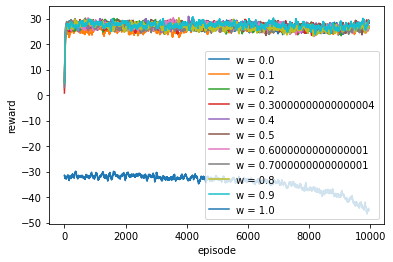

In [3]:
for w in np.arange(0, 1.1, 0.1):
    print(f'run for w = {w}')
    agent = Agent('1', DISCOUNT, EPSILON, ACTIONS, w, episodes=EPISODES)
    agent.value_iteration()
    rewards = agent.q_learning()
    averaged = get_average(rewards, 50)
    plt.plot(averaged, label=f'w = {w}')
    
plt.xlabel('episode')
plt.ylabel('reward')
plt.legend()
plt.show()